In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list)
#If it's already a list (or is NaN), leave it as-is.

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

50_Exercise

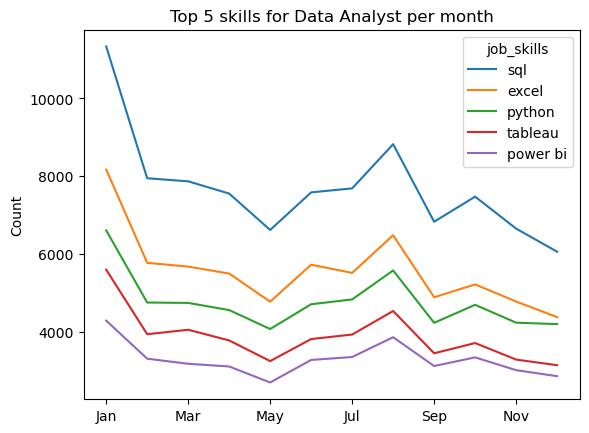

In [5]:
#create new column for month no.
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#explode the job_skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

#sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month_no'] = pd.to_datetime(df_DA_pivot['job_posted_month_no'], format='%m').dt.strftime('%b')
df_DA_pivot = df_DA_pivot.set_index('job_posted_month_no')

#plot the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 skills for Data Analyst per month')
plt.xlabel("")
plt.ylabel("Count")
plt.show()

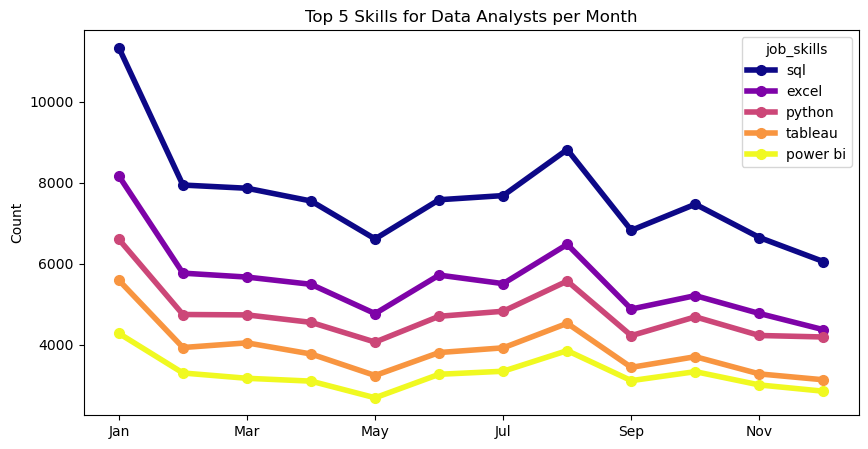

In [6]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-',        #other options ':', '--', '-.'
    colormap='plasma',    #viridis,  inferno, magma, etc.
    marker='o',            #plots 'o' where value is present (other values - s,*,1,2,+,etc.)
    markersize=7,
    figsize=(10, 5)
)

plt.title("Top 5 Skills for Data Analysts per Month")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

Matplotlib Scatter Plot

In [7]:
df_explode = df_DA.explode('job_skills')

skill_stats = df_explode.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),      #For each skill, take the median of the salary_year_avg values.
    skill_count = ('job_skills', 'count') )             #For each skill, count how many times it appears (i.e. how many job listings mention it).

skill_counts = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_counts)
skill_stats


,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


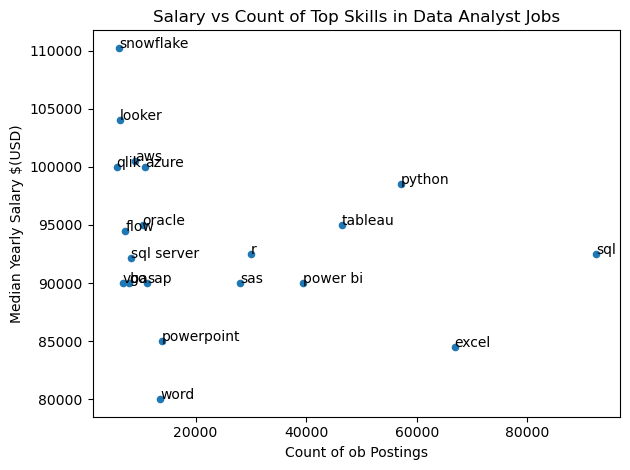

In [8]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of ob Postings')
plt.ylabel('Median Yearly Salary $(USD)')
plt.title('Salary vs Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
     plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)      #At the point where skill_count is X and median_salary is Y, show the skill name as a label.
plt.show()

In [9]:
from adjustText import adjust_text


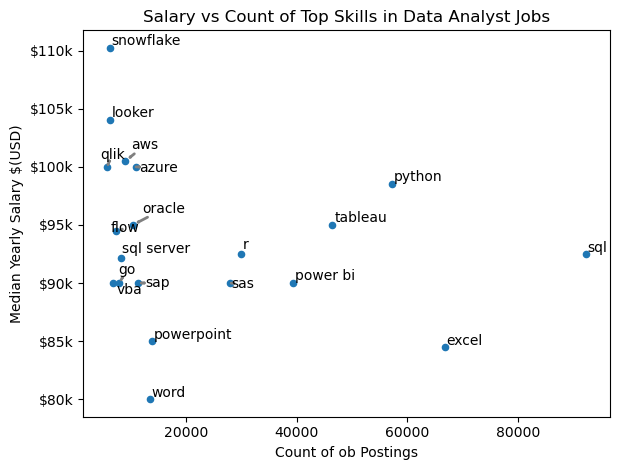

In [22]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of ob Postings')
plt.ylabel('Median Yearly Salary $(USD)')
plt.title('Salary vs Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()

texts= []                                 #fills this list every time the for loop operates ans 'txt' is formed
for i, txt in enumerate(skill_stats.index):
     texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))     #At the point where skill_count is X and median_salary is Y, show the skill name as a label.

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=2))

#to hunt the y-axis and change it's ormat to '$85k'
ax = plt.gca()    #get current axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

# ax - The Axes object (your plot). You must have something like fig, ax = plt.subplots() before this.
# ax.yaxis - Refers to the Y-axis of your plot.
# .set_major_formatter(...) - Sets the format for the major ticks (main labels) on that axis.
# plt.FuncFormatter(...) - A formatter class that lets you define custom functions to format tick labels.
# lambda y, pos: ... - A small anonymous function that formats each tick value y.
# f'${int(y/1000)}k' - This converts values like 125000 into $125k.

plt.show()